In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
data_dict = pd.read_excel('Data Dictionary - carprices.xlsx',index_col=0)
df = pd.read_csv('CarPrice_Assignment.csv',index_col=0)

In [4]:
#CLEANING DATA DICTIONARY
data_dict.dropna(axis=1, how="all",inplace=True)
data_dict.dropna(axis=0, how="all",inplace=True)
data_dict.set_index('Unnamed: 6',inplace = True)
data_dict.columns = ['featureName','Characteristics','scrap' ]
data_dict.drop('scrap',axis=1,inplace=True)
data_dict.dropna(axis=0,inplace=True)

In [5]:
data_dict

,featureName,Characteristics
Unnamed: 6,,
1,Car_ID,Unique id of each observation (Interger)
2,Symboling,"Its assigned insurance risk rating, A value of..."
3,carCompany,Name of car company (Categorical)
4,fueltype,Car fuel type i.e gas or diesel (Categorical)
5,aspiration,Aspiration used in a car (Categorical)
6,doornumber,Number of doors in a car (Categorical)
7,carbody,body of car (Categorical)
8,drivewheel,type of drive wheel (Categorical)
9,enginelocation,Location of car engine (Categorical)


In [6]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fueltype'] = le.fit_transform(df['fueltype'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['doornumber'] = le.fit_transform(df['doornumber'])
df['carbody'] = le.fit_transform(df['carbody'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])


#df['fueltype'].value_counts()

In [8]:
data_dict.loc[2][1]

'Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) '

In [9]:
df.shape

(205, 25)

In [10]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
df.dtypes

symboling             int64
CarName              object
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [13]:
df.describe().loc['mean','symboling']

0.8341463414634146

In [14]:
description = df.describe()
#for i in description.columns:
description.loc[['mean','50%'],'price']

mean    13276.710571
50%     10295.000000
Name: price, dtype: float64

/home/lenovo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

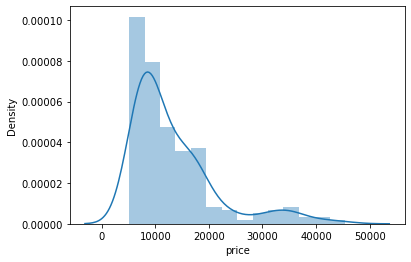

In [15]:
sns.distplot(df['price'])

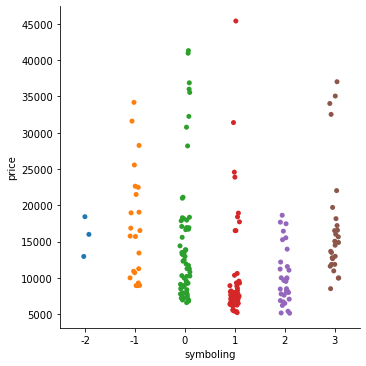

In [16]:
sns.catplot(x = 'symboling',y = 'price',data = df)

In [17]:
df.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,65.907805,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,2.145204,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.500000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,66.900000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [21]:
df['company'] = df['CarName'].str.split().str[0]
honda = df[df['company'] == 'honda']
toyota = df[df['company'] == 'toyota']

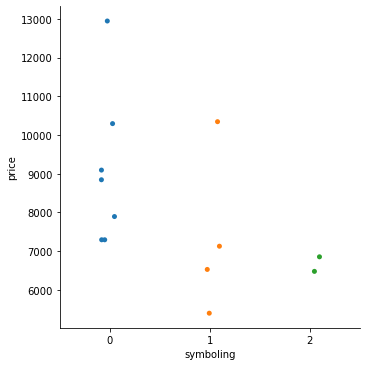

In [22]:
sns.catplot(x = 'symboling',y = 'price',data = honda)

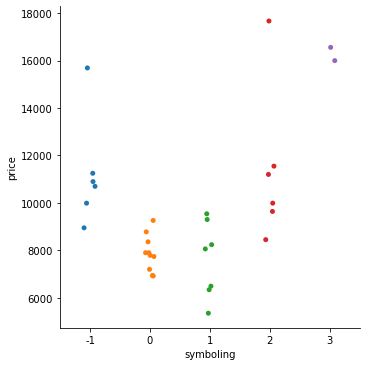

In [23]:
sns.catplot(x = 'symboling',y = 'price',data = toyota)

In [24]:
corr = df.corr()

In [25]:
corr

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,-0.232919,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,0.194311,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.664073,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,-0.596135,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,...,0.735433,0.521434,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


In [26]:
# correlation and betas

In [28]:
#Correlation with output variable
cor_target = corr['price']
#Selecting highly correlated features
relevant_features = cor_target[abs(cor_target)>0.5]
relevant_features

drivewheel    0.577992
wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
fuelsystem    0.526823
boreratio     0.553173
horsepower    0.808139
citympg      -0.685751
highwaympg   -0.697599
price         1.000000
Name: price, dtype: float64

In [29]:
relevant_features.index

Index(['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [30]:
# 9 features left after setting 0.5 minimum correlation.
# 12 after considering categorical features

In [31]:
df_ = df[relevant_features.index]

In [32]:
df_

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,
1,2,88.6,168.8,64.1,2548,130,5,3.47,111,21,27,13495.0
2,2,88.6,168.8,64.1,2548,130,5,3.47,111,21,27,16500.0
3,2,94.5,171.2,65.5,2823,152,5,2.68,154,19,26,16500.0
4,1,99.8,176.6,66.2,2337,109,5,3.19,102,24,30,13950.0
5,0,99.4,176.6,66.4,2824,136,5,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,2,109.1,188.8,68.9,2952,141,5,3.78,114,23,28,16845.0
202,2,109.1,188.8,68.8,3049,141,5,3.78,160,19,25,19045.0
203,2,109.1,188.8,68.9,3012,173,5,3.58,134,18,23,21485.0


<BarContainer object of 205 artists>

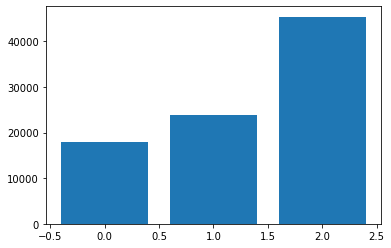

In [33]:
plt.bar(df_['drivewheel'],df_['price'])
# 2 rwd
# 1 fwd 
# 0 4wd

{'whiskers': [<matplotlib.lines.Line2D at 0x7f202e60d040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f202e60d760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f202e5ffd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f202e60de80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f202e61d250>],
 'means': []}

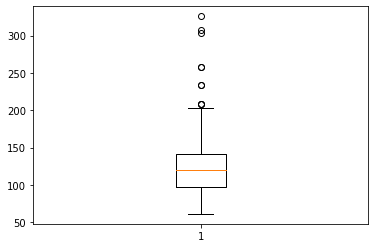

In [34]:
plt.boxplot(df_['enginesize'])

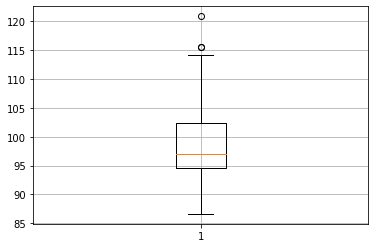

In [35]:
plt.boxplot(df_['wheelbase']) # gap between front and back wheels
plt.grid()

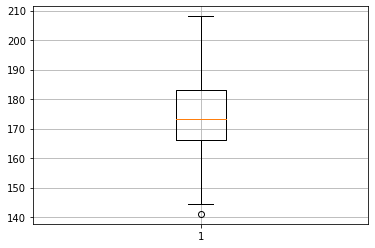

In [36]:
plt.boxplot(df_['carlength']) # gap between front and back wheels
plt.grid()

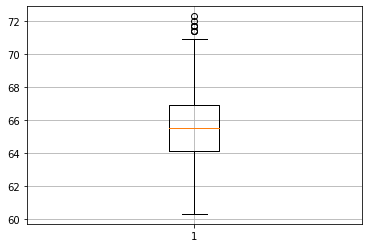

In [37]:
plt.boxplot(df['carwidth']) # gap between front and back wheels
plt.grid()

In [38]:
corr

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,-0.232919,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,0.194311,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.664073,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,-0.596135,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,...,0.735433,0.521434,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


In [39]:
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(df_.iloc[:,0:-1].values, i)
                          for i in range(len(df_.columns[:-1]))]
  
print(vif_data)

            VIF
0     11.292578
1   1831.630756
2   1814.404452
3   1772.316605
4    281.878184
5     56.752331
6      7.760314
7    275.535051
8     55.760760
9    408.420573
10   504.416831


In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_.iloc[:,0:-1], df_.iloc[:,-1], train_size=0.70)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143, 11), (62, 11), (143,), (62,))

In [43]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.7035410198191332


ValueError: x and y must be the same size

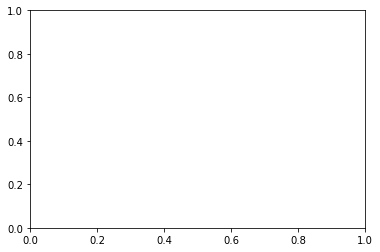

In [44]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [64]:
regr.predict([2,88.6,168.8,64.1,2548,130,5,3.47,111,21,27])

ValueError: Expected 2D array, got 1D array instead:
array=[2.000e+00 8.860e+01 1.688e+02 6.410e+01 2.548e+03 1.300e+02 5.000e+00
 3.470e+00 1.110e+02 2.100e+01 2.700e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.